# IMPORT STATEMENTS

In [2]:
!pip install catboost

In [3]:
# ==============================================
# IMPORT STATEMENTS WITH ORGANIZED CATEGORIES
# ==============================================

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (confusion_matrix, classification_report,
                            accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score,
                            precision_recall_curve, average_precision_score)

# Models
from xgboost import XGBClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Imbalanced learning
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
import matplotlib.pyplot as plt

# LOAD THE DATASET

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Магистратура/2 сем/Маголего/HI-Small_Trans.csv")

In [5]:
# ==============================================
# IMPORT LIBRARIES
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

In [6]:

# ==============================================
# DATA LOADING AND INITIAL INSPECTION
# ==============================================

# Load the dataset
try:
    df = pd.read_csv("/content/drive/MyDrive/Магистратура/2 сем/Маголего/HI-Small_Trans.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the path.")
    exit()

# Initial data inspection
print("\n=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset loaded successfully!

=== Dataset Overview ===
Shape: (5078345, 11)

First 5 rows:


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [7]:
# ==============================================
# DATA QUALITY CHECKS
# ==============================================

print("\n=== Data Quality Checks ===")

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicates found: {duplicate_count}")
df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

# Validate amount consistency
print("\nAmount Validation:")
print(f"Amount Received == Amount Paid for all transactions: {(df['Amount Received'] == df['Amount Paid']).all()}")
print(f"Receiving Currency == Payment Currency for all transactions: {(df['Receiving Currency'] == df['Payment Currency']).all()}")
print(f"Unique currencies match between receiving and payment: {set(df['Receiving Currency'].unique()) == set(df['Payment Currency'].unique())}")


=== Data Quality Checks ===

Missing values per column:
Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

Number of duplicates found: 9
Shape after removing duplicates: (5078336, 11)

Amount Validation:
Amount Received == Amount Paid for all transactions: False
Receiving Currency == Payment Currency for all transactions: False
Unique currencies match between receiving and payment: True



=== Target Variable Analysis ('Is Laundering') ===

Unique values in target variable:
[0 1]

Class distribution:
                 Count  Percentage
Is Laundering                     
0              5073159   99.898057
1                 5177    0.101943


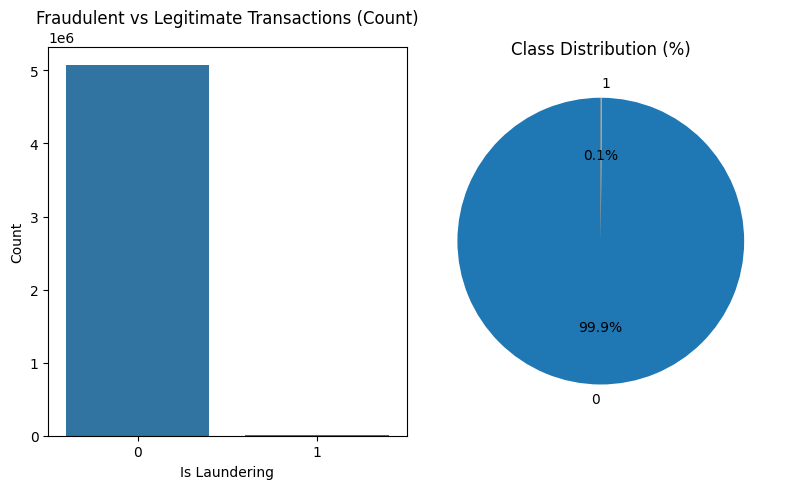

In [8]:

# ==============================================
# TARGET VARIABLE ANALYSIS
# ==============================================

print("\n=== Target Variable Analysis ('Is Laundering') ===")

# Check unique values and distribution
print("\nUnique values in target variable:")
print(df["Is Laundering"].unique())

target_counts = df["Is Laundering"].value_counts()
target_percent = df["Is Laundering"].value_counts(normalize=True) * 100

print("\nClass distribution:")
print(pd.DataFrame({'Count': target_counts, 'Percentage': target_percent}))

# Visualize target distribution
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Fraudulent vs Legitimate Transactions (Count)")
plt.xlabel("Is Laundering")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution (%)")
plt.tight_layout()
plt.show()


=== Temporal Analysis ===


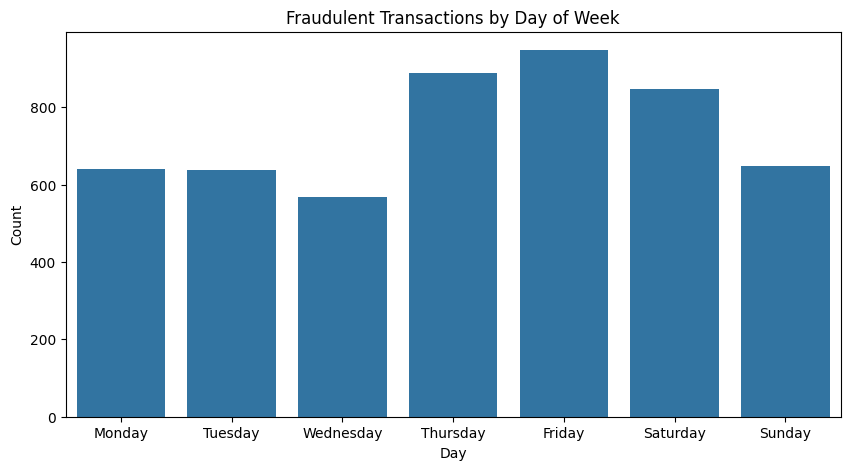


Chi-square test for Day of Week - p-value: 0.0000
There is a statistically significant relationship between day of week and fraud.


In [9]:
# ==============================================
# TEMPORAL FEATURE ENGINEERING AND ANALYSIS
# ==============================================

print("\n=== Temporal Analysis ===")

# Convert timestamp and extract features
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date
df["Day"] = df["Timestamp"].dt.day_name()
df["Time"] = df["Timestamp"].dt.time
df["Hour"] = df["Timestamp"].dt.hour
df["DayOfWeek"] = df["Timestamp"].dt.dayofweek  # Monday=0, Sunday=6
df["DayOfMonth"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month_name()

# Drop original timestamp
df.drop(columns=["Timestamp"], inplace=True)

# Analyze fraudulent transactions by day of week
fraud_by_day = df[df["Is Laundering"] == 1]["Day"].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, order=day_order)
plt.title("Fraudulent Transactions by Day of Week")
plt.ylabel("Count")
plt.show()

# Chi-square test for day of week
contingency = pd.crosstab(df['Is Laundering'], df['Day'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-square test for Day of Week - p-value: {p:.4f}")
print("There is a statistically significant relationship between day of week and fraud." if p < 0.05
      else "No significant relationship between day of week and fraud.")


=== Payment Method Analysis ===

Unique payment formats:
['Reinvestment' 'Cheque' 'Credit Card' 'ACH' 'Cash' 'Wire' 'Bitcoin']


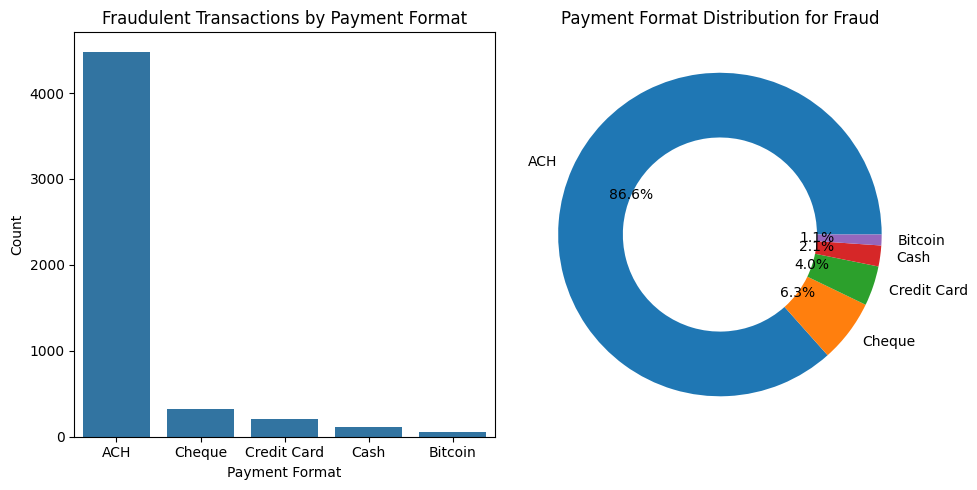

In [10]:

# ==============================================
# PAYMENT METHOD ANALYSIS
# ==============================================

print("\n=== Payment Method Analysis ===")

# Unique payment formats
print("\nUnique payment formats:")
print(df["Payment Format"].unique())

# Payment format distribution for fraudulent transactions
fraud_payment = df[df["Is Laundering"] == 1]["Payment Format"].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=fraud_payment.index, y=fraud_payment.values)
plt.title("Fraudulent Transactions by Payment Format")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
fraud_payment.plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Payment Format Distribution for Fraud")
plt.ylabel("")
plt.tight_layout()
plt.show()


=== Currency Analysis ===


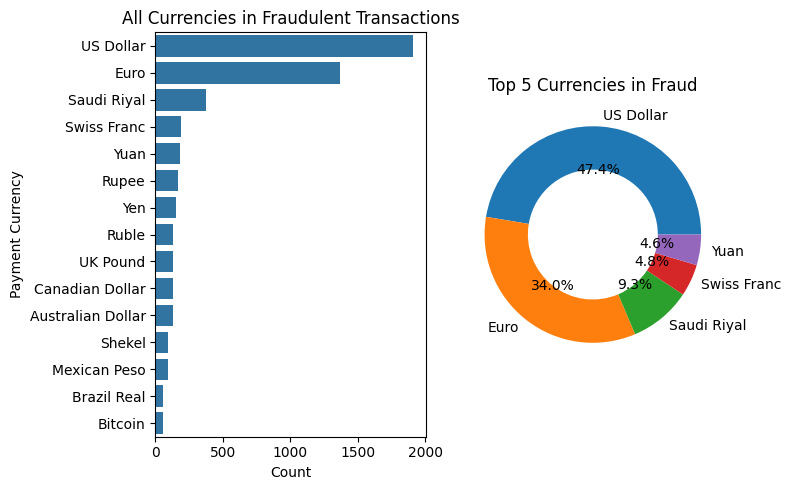

In [11]:

# ==============================================
# CURRENCY ANALYSIS
# ==============================================

print("\n=== Currency Analysis ===")

# Currency usage in fraudulent transactions
fraud_currency = df[df["Is Laundering"] == 1]["Payment Currency"].value_counts()

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.barplot(y=fraud_currency.index, x=fraud_currency.values)
plt.title("All Currencies in Fraudulent Transactions")
plt.xlabel("Count")

plt.subplot(1, 2, 2)
fraud_currency.head(5).plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Top 5 Currencies in Fraud")
plt.ylabel("")
plt.tight_layout()
plt.show()


=== Bank Analysis ===


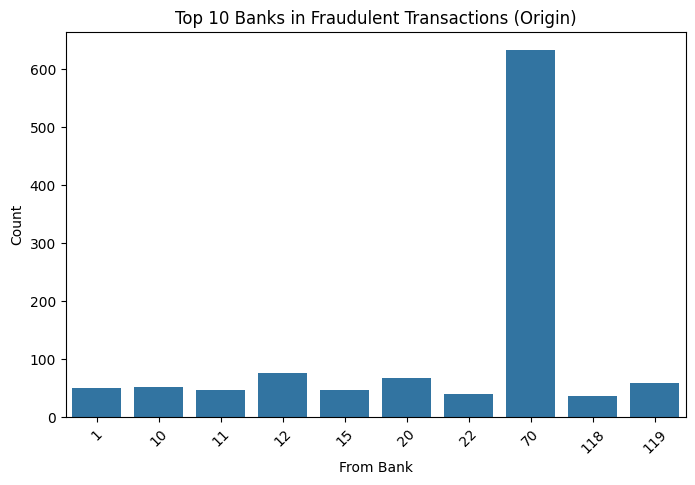

In [12]:
# ==============================================
# BANK ANALYSIS
# ==============================================

print("\n=== Bank Analysis ===")

# Top banks involved in fraudulent transactions
fraud_banks = df[df["Is Laundering"] == 1]["From Bank"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_banks.index, y=fraud_banks.values)
plt.title("Top 10 Banks in Fraudulent Transactions (Origin)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


=== Correlation Analysis ===


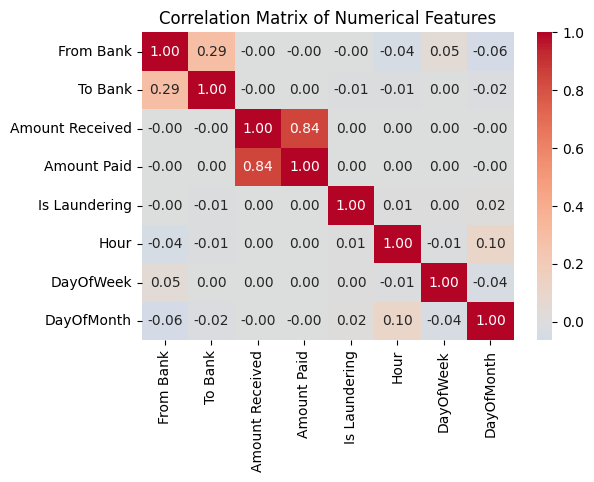

In [13]:
# ==============================================
# CORRELATION ANALYSIS
# ==============================================

print("\n=== Correlation Analysis ===")

# Calculate correlation matrix for numerical features
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [14]:

# ==============================================
# KEY FINDINGS SUMMARY
# ==============================================

print("\n=== Key Findings Summary ===")
print(f"1. Class imbalance: {target_percent[1]:.1f}% fraudulent vs {target_percent[0]:.1f}% legitimate transactions")
print(f"2. Most fraud occurs on: {fraud_by_day.idxmax()}")
print(f"3. Most common payment format for fraud: {fraud_payment.idxmax()}")
print(f"4. Most common currency for fraud: {fraud_currency.idxmax()}")
print(f"5. Top originating bank for fraud: {fraud_banks.idxmax()}")
print("\nAnalysis complete!")


=== Key Findings Summary ===
1. Class imbalance: 0.1% fraudulent vs 99.9% legitimate transactions
2. Most fraud occurs on: Friday
3. Most common payment format for fraud: ACH
4. Most common currency for fraud: US Dollar
5. Top originating bank for fraud: 70

Analysis complete!
